<a href="https://colab.research.google.com/github/lgsilva-dev/silo/blob/main/silo_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Silo Capacity Analysis and Forecast

## Contextualization

This dataset simulates soybean storage dynamics in Palotina, Paraná, Brazil, over a five-year period, providing insights into silo capacity, filling trends, and depletion rates. It is particularly useful for optimizing soybean logistics, reducing costs, and improving supply chain efficiency.

* Openai Generated Dataset

**Key Insights & Benefits**

* September to January is the planting and harvest period in Palotina, PR. During this time, silos are filled as soybeans are harvested, and trucks transport the crop to other locations.

* Reduce dependency on expensive sensor technology by leveraging historical trends to predict when silos will be low on stock.

* Improve efficiency by scheduling refills and transportation based on data-driven predictions.

**Questions This Analysis Can Answer**

* On which days of the week or month is a silo likely to have less than 10% of its capacity filled?

* How does harvest seasonality impact silo storage trends?

* What is the ideal time to schedule refilling operations for optimized logistics?

**Dataset Columns:**

* **date:** Daily timestamps covering five years.

* **silo_id:** Unique identifier for each silo.

* **latitude, longitude:** Random but realistic coordinates in Paraná, Brazil.

* **silo_volume (m³):** Amount of soy in the silo at a given time.

* **silo_capacity (m³):** Max capacity of the silo (only >0 from September to January, otherwise 0).

* **planting_area_hectares:** Area assigned to planting.

* **low_capacity_flag:** Indicates whether the silo is below 10% of its capacity (1 = Yes, 0 = No).

**DISCLAIMER:** A synthetically generated dataset can be useful to learn about the problems and help to mitagate solutions, real data will diverge from this though. Real data collection wont be so consistent due to natural variations such as weather, transportation delays, operational inconsistencies and many others.


## Data Extraction and Cleaning

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gocn/silo_data_2019_2024.csv')

In [ ]:
df.head()

,date,silo_id,latitude,longitude,silo_volume(m3),silo_capacity(m3),planting_area_hectares,low_capacity_flag
0,2019-01-01,1,-24.348956,-51.541936,392.364756,813,325.020598,0
1,2019-01-01,2,-23.801273,-50.870518,1695.580233,1988,235.990221,0
2,2019-01-01,3,-24.055075,-50.576353,1123.549265,1450,355.234236,0
3,2019-01-01,4,-24.062585,-52.694446,1011.328478,1283,438.226173,0
4,2019-01-01,5,-23.171511,-52.123648,295.614294,1185,409.849611,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21920 entries, 0 to 21919
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    21920 non-null  object 
 1   silo_id                 21920 non-null  int64  
 2   latitude                21920 non-null  float64
 3   longitude               21920 non-null  float64
 4   silo_volume(m3)         21920 non-null  float64
 5   silo_capacity(m3)       21920 non-null  int64  
 6   planting_area_hectares  21920 non-null  float64
 7   low_capacity_flag       21920 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.3+ MB


* This code can be useful to check null values and columns types.

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21920 entries, 0 to 21919
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    21920 non-null  datetime64[ns]
 1   silo_id                 21920 non-null  int64         
 2   latitude                21920 non-null  float64       
 3   longitude               21920 non-null  float64       
 4   silo_volume(m3)         21920 non-null  float64       
 5   silo_capacity(m3)       21920 non-null  int64         
 6   planting_area_hectares  21920 non-null  float64       
 7   low_capacity_flag       21920 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 1.3 MB


In [ ]:
df['silo_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
df['silo_capacity(m3)'].unique()

array([ 813, 1988, 1450, 1283, 1185,  727,  762, 1610, 1831,  652,    0])

In [ ]:
df['low_capacity_flag'].unique()

array([0, 1])

 * Converting date column to datetime type for further analysis

## Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Extract year and month for analysis
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [ ]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

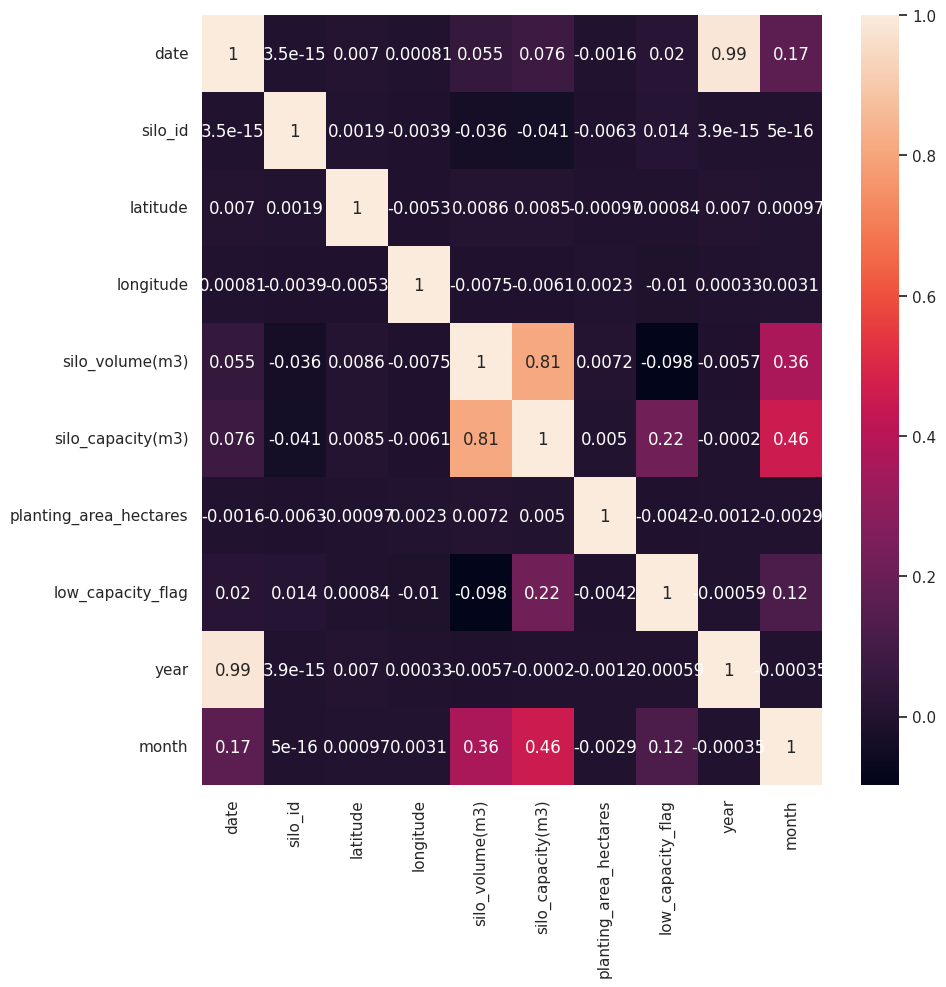

In [ ]:
correlations = df.corr()

f, ax = plt.subplots(figsize=(10,10)), sns.heatmap(correlations, annot = True);

**Observations: The correlations are minimal but it's still possible find a significancy on them.**
* **Months** are correlated to the **silo's volume and capacity.**
* **Silo's volume and capacity** are correlated to each other.
* **Silo's capacity** is correlated to **low capacity flag.**
* **Low capacity flag** is correlated to **Month.**

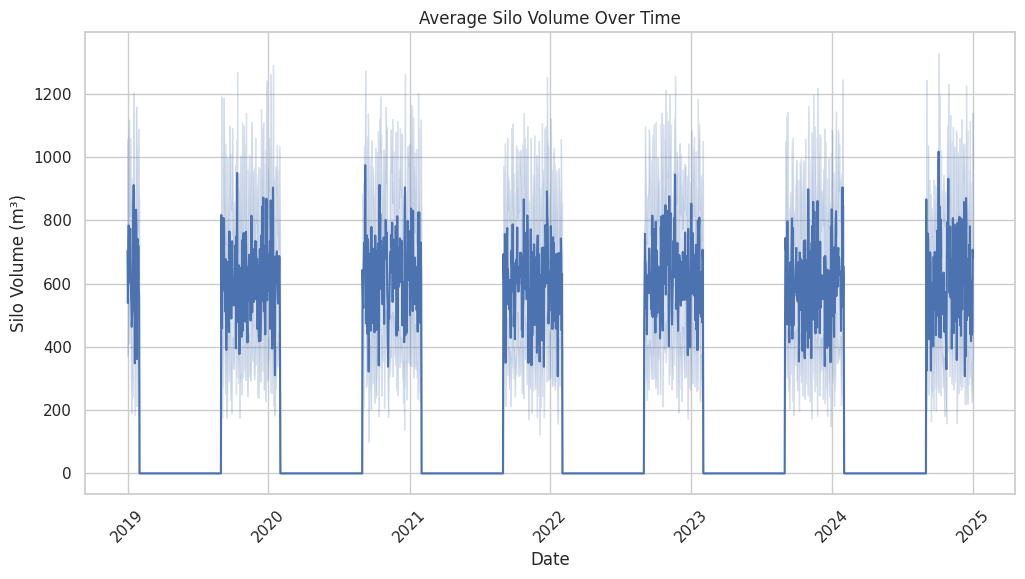

In [ ]:
# Plot 1: Silo Volume Distribution Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="silo_volume(m3)", estimator="mean")
plt.title("Average Silo Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Silo Volume (m³)")
plt.xticks(rotation=45)
plt.show()

* Goal: Show how average silo volume changes over time.

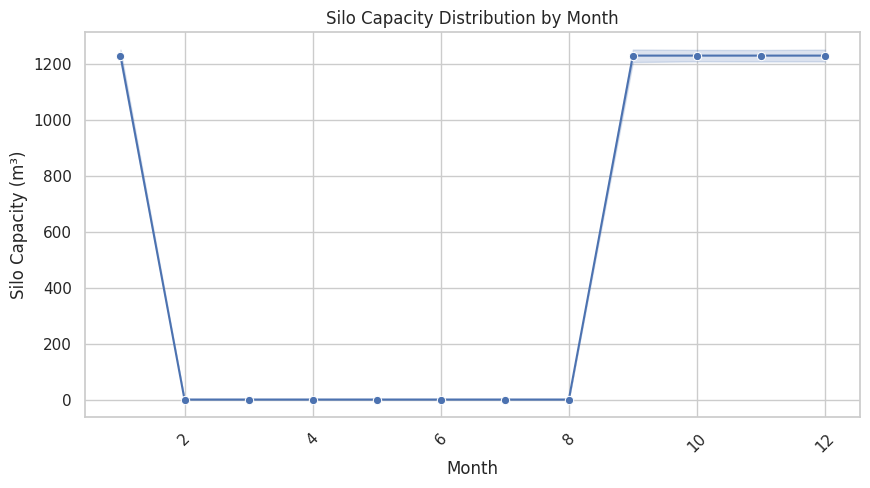

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="month", y="silo_capacity(m3)", marker="o")
plt.title("Silo Capacity Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Silo Capacity (m³)")
plt.xticks(rotation=45)
plt.show()


 * Goal: See if silo capacity varies over months.

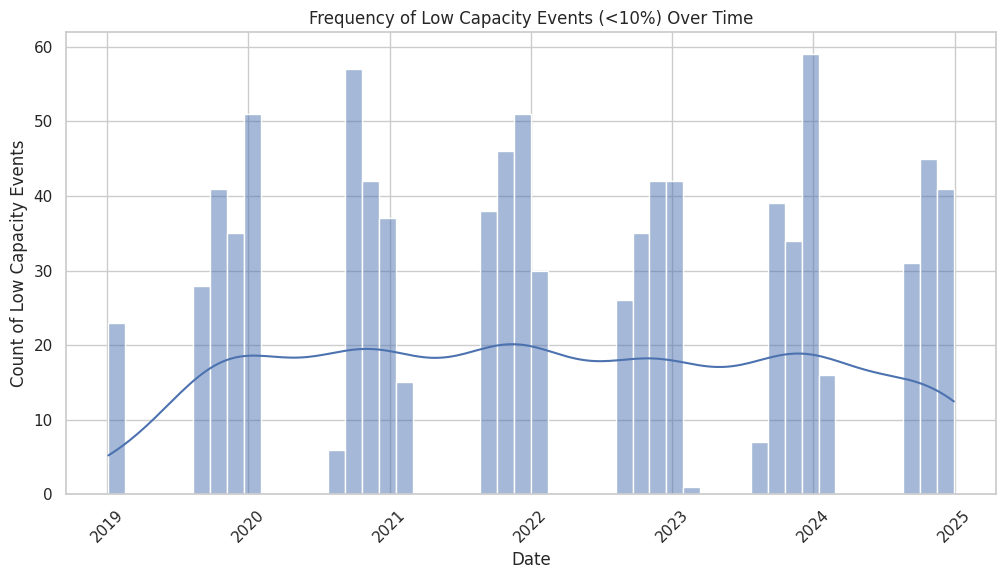

In [ ]:
# Plot 3: Frequency of Low Capacity Events Over Time
if "low_capacity_flag" in df.columns:
    low_capacity_df = df[df["low_capacity_flag"] == 1]
    plt.figure(figsize=(12, 6))
    sns.histplot(data=low_capacity_df, x="date", bins=50, kde=True)
    plt.title("Frequency of Low Capacity Events (<10%) Over Time")
    plt.xlabel("Date")
    plt.ylabel("Count of Low Capacity Events")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'low_capacity_flag' not found in the dataset.")

*  Goal: Identify when silos frequently reach low capacity (low_capacity_flag = 1)

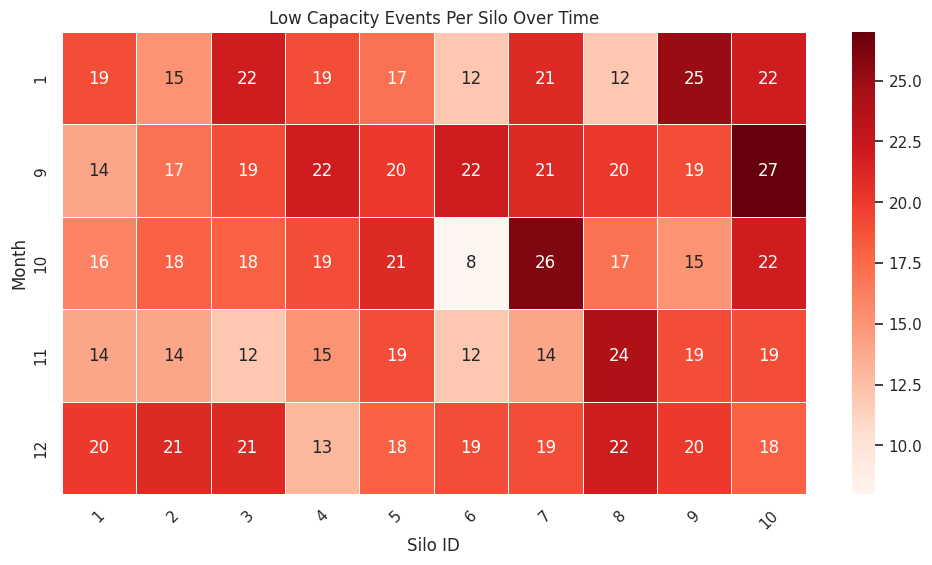

In [ ]:
if "low_capacity_flag" in df.columns:
    pivot = df[df["low_capacity_flag"] == 1].groupby(["month", "silo_id"]).size().unstack()

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, cmap="Reds", linewidths=0.5, annot=True, fmt="g")
    plt.title("Low Capacity Events Per Silo Over Time")
    plt.xlabel("Silo ID")
    plt.ylabel("Month")
    plt.xticks(rotation=45)
    plt.show()


* Goal: Detect which silos frequently hit critical levels each month.

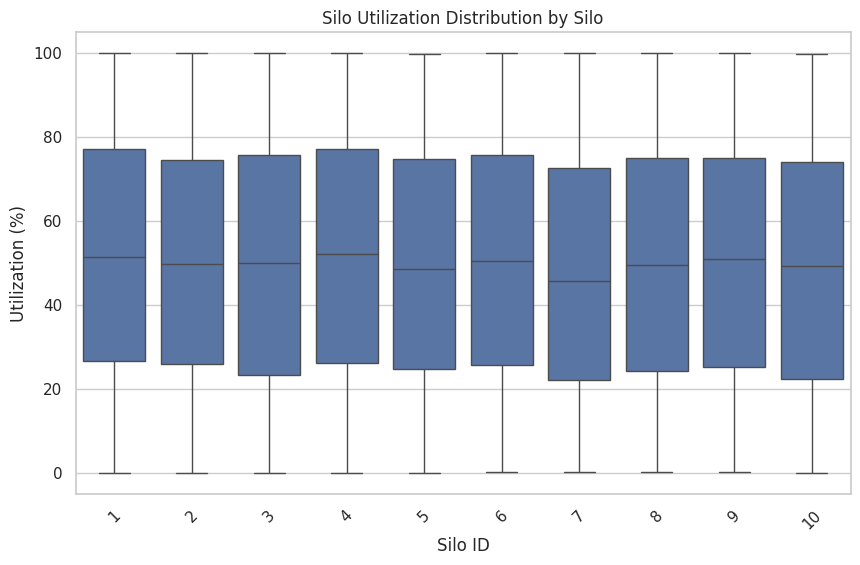

In [ ]:
df["silo_utilization"] = (df["silo_volume(m3)"] / df["silo_capacity(m3)"]) * 100

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="silo_id", y="silo_utilization")
plt.title("Silo Utilization Distribution by Silo")
plt.xlabel("Silo ID")
plt.ylabel("Utilization (%)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
silo_df = df[["silo_id", "latitude", "longitude", "silo_capacity(m3)"]].drop_duplicates(subset=["silo_id"])

,silo_id,latitude,longitude,silo_capacity(m3)
0,1,-24.348956,-51.541936,813
1,2,-23.801273,-50.870518,1988
2,3,-24.055075,-50.576353,1450
3,4,-24.062585,-52.694446,1283
4,5,-23.171511,-52.123648,1185
5,6,-23.011076,-52.116845,727
6,7,-23.287050,-53.366478,762
7,8,-24.332355,-51.103757,1610
8,9,-23.617517,-51.533086,1831
9,10,-24.281733,-50.912809,652


In [ ]:
# Improved Silo Size Bar Chart
fig = px.bar(
    silo_df,
    x="silo_id",
    y="silo_capacity(m3)",
    title="Silo's Size",
    height=700,
    color="silo_capacity(m3)",
    color_continuous_scale="Viridis"
)
fig.update_layout(
    xaxis_title="Silo ID",
    yaxis_title="Silo Capacity (m³)",
    template="plotly_white",
    xaxis_tickangle=-45
)
fig.show()

In [ ]:
df_2024 = df[df["year"] == 2024]

,date,silo_id,latitude,longitude,silo_volume(m3),silo_capacity(m3),planting_area_hectares,low_capacity_flag,year,month
18260,2024-01-01,1,-24.035550,-52.380399,436.769851,813,360.366761,0,2024,1
18261,2024-01-01,2,-23.696660,-51.148339,1596.260235,1988,469.825155,0,2024,1
18262,2024-01-01,3,-23.381451,-51.970807,723.482868,1450,159.270723,0,2024,1
18263,2024-01-01,4,-23.366030,-50.537095,912.906181,1283,75.982478,0,2024,1
18264,2024-01-01,5,-23.924029,-52.937242,106.788182,1185,200.925462,1,2024,1
...,...,...,...,...,...,...,...,...,...,...
21915,2024-12-31,6,-24.279862,-50.787734,566.984332,727,251.463686,0,2024,12
21916,2024-12-31,7,-24.491474,-52.581349,222.957845,762,219.641320,0,2024,12
21917,2024-12-31,8,-23.844044,-51.665917,730.248254,1610,93.072325,0,2024,12
21918,2024-12-31,9,-23.602796,-52.845529,1431.441071,1831,443.143508,0,2024,12


In [ ]:
# Improved Silo Size Bar Chart
fig = px.line(
    df_2024,
    x="date",
    y="silo_volume(m3)",
    title="Silo's Volume in 2024",
    height=700,
    color="silo_id",
)
fig.update_layout(
    xaxis_title="Silo ID",
    yaxis_title="Silo Capacity (m³)",
    template="plotly_white",
    xaxis_tickangle=-45
)
fig.show()

In [ ]:
# Filter only rows where low_capacity_flag == 1
df_low_capacity = df_2024[df_2024["low_capacity_flag"] == 1]

# Group by silo_id and month, then count occurrences
low_capacity_counts = df_low_capacity.groupby(["silo_id", "month"]).size().reset_index(name="count")

# Create the plot
fig = px.line(
    low_capacity_counts,
    x="month",
    y="count",
    color="silo_id",
    title="Trends of Low Capacity Flag by Month (2024)",
    labels={"month": "Month", "count": "Low Capacity Occurrences", "silo_id": "Silo ID"},
    height=700
)

fig.show()

In [ ]:
df_2024_currentSilo = df_2024[df_2024["silo_id"] == 3]

# Filter only rows where low_capacity_flag == 1
df_low_capacity = df_2024_currentSilo[df_2024_currentSilo["low_capacity_flag"] == 1]

# Group by silo_id and month, then count occurrences
low_capacity_counts = df_low_capacity.groupby(["silo_id", "month"]).size().reset_index(name="count")

# Create the plot
fig = px.bar(
    low_capacity_counts,
    x="month",
    y="count",
    color="count",
    title="Occurrences of Low Capacity Flag by Month (2024)",
    labels={"month": "Month", "count": "Low Capacity Occurrences", "silo_id": "Silo ID"},
    height=700
)

fig.show()

In [ ]:
# Create map
fig = px.scatter_mapbox(silo_df,
                        lat="latitude",
                        lon="longitude",
                        hover_name="silo_id",
                        hover_data={"silo_capacity(m3)": True},
                        color="silo_capacity(m3)",
                        size="silo_capacity(m3)",
                        zoom=6,
                        height=700,
                        title="Silo Locations in Paraná, Brazil")

# Set map style
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()